In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
from matplotlib.colors import LightSource
import matplotlib.patheffects as PathEffects
from obspy.imaging.beachball import beach
import matplotlib.animation as anm
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'
from pyproj import Geod
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import warnings
warnings.filterwarnings("ignore")
from scipy.interpolate import Rbf
from matplotlib.mlab import griddata
from geographiclib.geodesic import Geodesic
import math
geod = Geodesic.WGS84
import matplotlib.patheffects as path_effects
initfontsize=8
mpl.rc('axes', labelsize=initfontsize, titlesize=initfontsize)
mpl.rc('xtick', labelsize=initfontsize)
mpl.rc('ytick', labelsize=initfontsize)
mpl.rc('legend', fontsize=initfontsize)
mpl.rc('savefig', dpi=600)
mpl.rc('font', size=initfontsize)
# color code based on Wong, 2011, Nmeth; conversion from rgb to html via ColorHexa
blue='#0072b2'; red = '#d5000d'; yellow = '#ffffb2'; purple = '#cc79a7'
orange = '#d55e00'; gray = '#525252'; green = '#009e73'; reddish = '#cc79a7'

In [2]:
def gen3dview(ax):
    alpharim = 0.8; linewidth = 0.8
    data = np.loadtxt('data/project_rim_SBF.txt'); x, y, z = (data[:,0], data[:,1], data[:,2])
    ax.plot(x, y, z, color = blue, zorder=-1, alpha=alpharim, solid_capstyle='round', linewidth = linewidth)
    data = np.loadtxt('data/project_rim_SCBF.txt'); x, y, z = (data[:,0], data[:,1], data[:,2])
    ax.plot(x, y, z, color = blue, zorder=-1, alpha=alpharim, solid_capstyle='round', linewidth = linewidth)
    data = np.loadtxt('data/project_rim_NCBF.txt'); x, y, z = (data[:,0], data[:,1], data[:,2])
    ax.plot(x, y, z, color = blue, zorder=-1, alpha=alpharim, solid_capstyle='round', linewidth = linewidth)
    data = np.loadtxt('data/project_rim_NBF.txt'); x, y, z = (data[:,0], data[:,1], data[:,2])
    ax.plot(x, y, z, color = blue, zorder=-1, alpha=alpharim, solid_capstyle='round', linewidth = linewidth)
    data = np.loadtxt('data/project_rim_NPF.txt'); x, y, z = (data[:,0], data[:,1], data[:,2])
    ax.plot(x, y, z, color = red, zorder=-2, alpha=alpharim, solid_capstyle='round', linewidth = linewidth)
    data = np.loadtxt('data/project_rim_SPF.txt'); x, y, z = (data[:,0], data[:,1], data[:,2])
    ax.plot(x, y, z, color = red, zorder=-2, alpha=alpharim, solid_capstyle='round', linewidth = linewidth)
    ax.scatter(103.322, 31.002, 15.0, marker='*', c = yellow, s = 30, zorder=10, linewidth = 0.5, alpha = 0.8, edgecolor='k')
    data = np.loadtxt("data/2009_Xu_Geology_SM_BF_PF.txt", usecols=(1,2), comments="#")
    x, y = (data[:,0], data[:,1])
    ax.scatter(x, y, 0, s = 2, linewidth=0.1, alpha=alpharim, facecolor = 'w', edgecolor='none')
    data = np.loadtxt("data/2009_Xu_Geology_SM_XDF.txt", usecols=(1,2), comments="#")
    x, y = (data[:,0], data[:,1])
    ax.scatter(x, y, 0, s = 2, linewidth=0.1, alpha=alpharim, facecolor = green, edgecolor='none', zorder=10)
    ax.set_xlabel('Longitude ($\degree$E)')
    ax.set_ylabel('Latitude ($\degree$N)')
    ax.set_zlabel('Depth (km)')
    ax.set_xlim([103.0, 106])
    ax.set_ylim([30.5, 33.1])
    ax.set_zlim([-1, 38.4])
    ax.set_xticks(np.arange(103, 107, 2))
    ax.set_yticks(np.arange(31, 34, 1))
    ax.set_zticks(np.arange(0, 50, 20))
    ax.grid(False)
    ax.invert_zaxis()
def DrawFaultSegment(m):
    data=np.loadtxt('data/rim_SBF.txt'); x, y = m(data[:,0], data[:,1])
    m.plot(x,y,color=blue,lw=2, zorder = 2, solid_capstyle='round')
    x, y = m(103.35, 31.5)
    plt.text(x, y, 'SBF', fontsize=initfontsize, va='bottom', ha='left', weight='bold', color=blue, zorder=10,\
            path_effects=[PathEffects.withStroke(linewidth=2,foreground='w')])
    data=np.loadtxt('data/rim_SCBF.txt'); x, y = m(data[:,0], data[:,1])
    m.plot(x,y,color=blue,lw=2, zorder = 2, solid_capstyle='round')
    x, y = m(103.8, 31.87)
    plt.text(x, y, 'SCBF', fontsize=initfontsize, va='bottom', ha='left', weight='bold', color=blue, zorder=10, \
            path_effects=[PathEffects.withStroke(linewidth=2,foreground='w')])
    data=np.loadtxt('data/rim_NCBF.txt'); x, y = m(data[:,0], data[:,1])
    m.plot(x,y,color=blue,lw=2, zorder = 2, solid_capstyle='round')
    x, y = m(104.1, 32.17)
    plt.text(x, y, 'NCBF', fontsize=initfontsize, va='bottom', ha='left', weight='bold', color=blue, zorder=10, \
            path_effects=[PathEffects.withStroke(linewidth=2,foreground='w')])
    data=np.loadtxt('data/rim_NBF.txt'); x, y = m(data[:,0], data[:,1])
    m.plot(x,y,color=blue,lw=2, zorder = 2, solid_capstyle='round')
    x, y = m(104.7, 32.5)
    plt.text(x, y, 'NBF', fontsize=initfontsize, va='bottom', ha='left', weight='bold', color=blue, zorder=10, \
             path_effects=[PathEffects.withStroke(linewidth=2,foreground='w')])
    data=np.loadtxt('data/rim_SPF.txt'); x, y = m(data[:,0], data[:,1])
    m.plot(x,y,color=red,lw=2,zorder=1, solid_capstyle='round')
    x, y = m(103.55, 30.8)
    plt.text(x, y, 'SPF', fontsize=initfontsize, va='bottom', ha='left', weight='bold', color=red, zorder=10, \
             path_effects=[PathEffects.withStroke(linewidth=2,foreground='w')])
    data=np.loadtxt('data/rim_NPF.txt'); x, y = m(data[:,0], data[:,1])
    m.plot(x,y,color=red,lw=2,zorder=1, solid_capstyle='round')
    x, y = m(104, 31.15)
    plt.text(x, y, 'NPF', fontsize=initfontsize, va='bottom', ha='left', weight='bold', color=red, zorder=10, \
            path_effects=[PathEffects.withStroke(linewidth=2,foreground='w')])
    data = np.loadtxt("data/rim_top.txt")
    for i in np.arange(0,6,1):
        x, y = m(data[i*2:i*2+2, 0], data[i*2:i*2+2, 1])
        m.plot(x,y,color=gray,lw=2,zorder=3, solid_capstyle='round')
def DrawSurfaceRuptures(m):
    data = np.loadtxt("data/2009_Xu_Geology_SM_BF.txt", usecols=(1,2), comments="#")
    x, y = m(data[:,0], data[:,1])
    m.scatter(x, y, s = 15, linewidth=0.5, alpha=0.85, facecolor= 'w', zorder=10, edgecolor='k')
    data = np.loadtxt("data/2009_Xu_GEOLOGY_SM_PF.txt", usecols=(1,2), comments="#")
    x, y = m(data[:,0], data[:,1])
    m.scatter(x, y, s = 15, linewidth=0.5, alpha=0.85, facecolor = 'w', zorder=10, edgecolor='k')
    data = np.loadtxt("data/2009_Xu_Geology_SM_XDF.txt", usecols=(1,2), comments="#")
    x, y = m(data[:,0], data[:,1])
    m.scatter(x, y, s = 15, linewidth=0.5, alpha=0.85, facecolor = green, zorder=10, edgecolor='k')
    x, y = m(103.8, 31)
    plt.text(x, y, 'XDF', fontsize=initfontsize, va='bottom', ha='left', weight='bold', color=green, zorder=10, \
            path_effects=[PathEffects.withStroke(linewidth=2,foreground='w')])
def DrawTopography(m):
    my_example_nc_file = 'data/gmted_103-106-30.5-33.1.grd'
    fh = Dataset(my_example_nc_file, mode='r')
    lons = fh.variables['x'][:]; lats = fh.variables['y'][:]; tmax = fh.variables['z'][:]
    fh.close()
    lon, lat = np.meshgrid(lons, lats); xi, yi = m(lon, lat)
    ls = LightSource(azdeg=315, altdeg=45)
    cm = plt.cm.get_cmap('gray_r')
    rgb = ls.shade(tmax, cmap=cm, blend_mode='overlay', vmin=0, vmax=6000)
    cs = m.imshow(rgb, interpolation='none', alpha=0.5, cmap=cm, vmin=0, vmax=6000)    
def circle(geod, lon, lat, radius, n_samples):
    lons, lats, back_azim = geod.fwd(np.repeat(lon, n_samples),
                                     np.repeat(lat, n_samples),
                                     np.linspace(360, 0, n_samples),
                                     np.repeat(radius, n_samples),
                                     radians=False,
                                     )
    return lons, lats
def DrawStationDistri(ax):
    data = np.loadtxt("data/epicenter.dat", usecols=(0,1))
    lat_0 = data[0]
    lon_0 = data[1]
    m = Basemap(projection='aeqd',lat_0=lat_0,lon_0=lon_0, resolution='l')
    m.drawcoastlines(linewidth=0.5, zorder=1, color='gray')
    trisize = 30
    geod = Geod(ellps='WGS84')
    lons, lats = circle(geod, lon_0, lat_0, 3335.85*1e3, 100)
    x, y = m(lons, lats)
    m.plot(x, y, color='gray', zorder = 1)
    lons, lats = circle(geod, lon_0, lat_0, 10007.55*1e3, 100)
    x, y = m(lons, lats)
    m.plot(x, y, color='gray', zorder = 1)
    bbox_props = dict(boxstyle="round", fc="w", ec="w", alpha=0.9, pad=0)
    data = np.loadtxt("data/station.list", usecols=(2, 3))
    lon = data[:,1]
    lat = data[:,0]
    sta =  np.genfromtxt("data/station.list", usecols=(0), dtype=('str'))
    x, y = m(lon, lat)
    m.scatter(x, y, marker = "^", facecolors=red, edgecolors='none', s = trisize, alpha = 0.8, zorder = 2)
    m.scatter(x, y, marker = "^", facecolors='none', edgecolors='k', s = trisize, zorder = 2, lw=0.5)
    #for sta, x, y in zip(sta, x, y):
    #    plt.text(x, y, sta, fontsize=2, color='gray')
    x, y = m(lon_0, lat_0)
    m.scatter(x, y, marker = "*", facecolors=yellow, edgecolors='k', s = 200, alpha = 0.85, zorder = 3)

# Figure 1

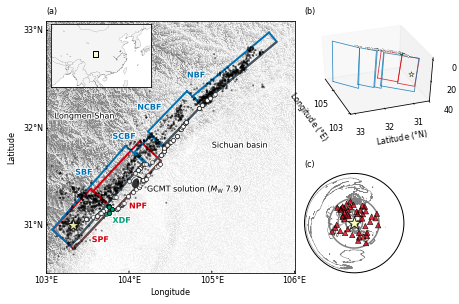

In [12]:
w=6.9; h=6.9; wh=w/h
fig=plt.figure(figsize=(w, h))
#############################################################
lonmin=103; lonmax=106; latmin=30.5; latmax=33.1
m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
            rsphere=(6378137.00,6356752.3142),resolution='c',projection='merc')
x, y=m([lonmin, lonmax], [latmin, latmax])
aspect=max(x)/max(y)
ax1=fig.add_axes([0.1, 0.1, 0.5, 0.5/aspect])
axp1=ax1.get_position()
ax1.set_xlabel('Longitude', labelpad=15)
ax1.set_ylabel('Latitude', labelpad=30)
m.drawparallels(np.arange(-80.,81.,1.),labels=[1,0,0,0], fontsize=initfontsize, dashes=(2,10000), color='k')
m.drawmeridians(np.arange(-180.,181.,1.),labels=[0,0,0,1], fontsize=initfontsize, dashes=(2,10000), color='k')
DrawTopography(m)
DrawFaultSegment(m)
DrawSurfaceRuptures(m)
x,y=m(103.322, 31.002)
ax1.scatter(x, y, s=160, marker='*', facecolor=yellow, alpha=0.85, lw=1, zorder=10, edgecolor='k')
data=np.loadtxt('data/2010_Yu_Relocated.txt', usecols=(6,7))
x, y=m(data[:,1], data[:,0])
ax1.scatter(x, y, s=4, color='k', edgecolor='none', linewidth=0.1, alpha=0.5, \
          label='Relocated aftershocks', zorder=9)
x, y=m(103.1, 32.1)
ax1.text(x, y, 'Longmen Shan', \
         path_effects=[PathEffects.withStroke(linewidth=2,foreground='w')])
x, y=m(105, 31.8)
ax1.text(x, y, 'Sichuan basin',  \
         path_effects=[PathEffects.withStroke(linewidth=2,foreground='w')])
x, y=m(104.100, 31.440)
focmecs=[0.569, 0.01, -0.579, -0.199, 0.561, -0.348]
ax1=plt.gca()
b=beach(focmecs, xy=(x, y), width=7.9*2000, linewidth=0.5, alpha=0.8, facecolor='k')
ax1.add_collection(b).set_zorder(8)
ax1.text(x+13000, y, r'GCMT solution ($M_{\rm{W}}$ 7.9)', ha='left',va='top', \
        path_effects=[PathEffects.withStroke(linewidth=2,foreground='w')])
##################################################
ax2=fig.add_axes([axp1.x0+0.01,axp1.y1-0.17,0.2,0.2])
axp2=ax2.get_position()
m=Basemap(llcrnrlon=80,llcrnrlat=15,urcrnrlon=135,urcrnrlat=45,\
            rsphere=(6378137.00,6356752.3142),resolution='l',projection='merc')
m.drawcoastlines(linewidth=0.1)
m.drawcountries(linewidth=0.1)
m.fillcontinents(color='whitesmoke')
x, y=m([103,106,106,103,103], [30.5,30.5,33.1,33.1,30.5])
ax2.plot(x,y,color='k', solid_capstyle='round', linewidth=1)
ax2.fill(x,y,color=yellow,alpha=0.5)
###################################################
ax3=fig.add_axes([axp1.x1+0.01, axp1.y1-0.2, 0.3, 0.2], projection = '3d')
axp3=ax3.get_position()
ax3.tick_params(labelsize=initfontsize)
gen3dview(ax3)
ax3.view_init(40,160) #seen from 290 azimuth for `160` in `view_init`
#####################################################
ax4=fig.add_axes([axp1.x1+0.02, axp1.y0, 0.2, 0.2])
axp4=ax4.get_position()
DrawStationDistri(ax4)
#####################################################
fig.text(axp1.x0, axp1.y1+0.01, '(a)', va='bottom', ha='left')
fig.text(axp4.x0, axp1.y1+0.01, '(b)', va='bottom', ha='left')
fig.text(axp4.x0, axp4.y1+0.01, '(c)', va='bottom', ha='left')
plt.savefig('doc/fig1_metaR1.pdf')
plt.show()

# Figure 2

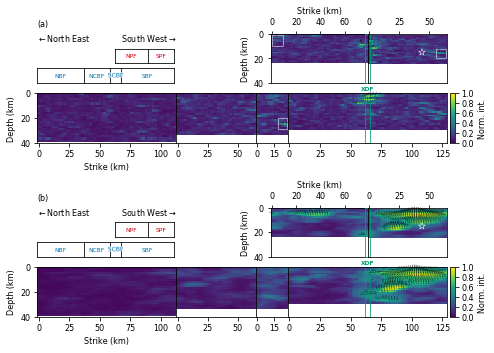

In [13]:
w=6.9; h=6.9; wh=w/h
fig=plt.figure(figsize=(w, h))
cmap=plt.get_cmap('viridis')

def signalrake(data, xloc, yloc, flag):
    data=np.loadtxt(data)
    x, y, z=(data[:,7], data[:,2], data[:,4])
    dip=data[0:1, 3]
    width=max(x)-min(x)
    height=40
    aspect=width/height
    ax=fig.add_axes([xloc, yloc, 0.1*aspect, 0.1])
    normal=mpl.colors.Normalize(vmin=0, vmax=1)
    colors=plt.cm.viridis(normal(z))
    dy = 2.0 * np.sin(np.radians(dip))
    for strike, depth, signal in zip(x, y, colors):
        rect=plt.Rectangle((strike-1, depth-(dy/2.0)), 2.0, dy, facecolor=signal, edgecolor=signal, linewidth=0.001)
        ax.add_patch(rect)
    if flag == 0:
        rake = -180.0 + (data[:, 6] +36 - 1) * 5.0
    elif flag == 90:
        rake = 90
    elif flag == 180:
        rake = 180
    zscale = np.zeros(len(z)); xarrow = np.zeros(len(z)); yarrow = np.zeros(len(z))
    arrowlimit=0.5
    for i in np.arange(0,len(z),1):
        if z[i] > arrowlimit:
            zscale[i] = z[i]; xarrow[i] = x[i]; yarrow[i] = y[i]
        else:
            zscale[i] = 0; xarrow[i] = 0; yarrow[i] = 0        
    ax.quiver(xarrow, yarrow, np.cos(rake * np.pi / 180.0) * zscale * 20, \
              np.sin(rake * np.pi / 180.0) * zscale * 20, \
              units = 'x', width = 0.3, scale = 1 / 0.3, clip_on = False, alpha = 0.6, color = 'k', zorder = 5, \
              minlength=0)    
    ax.set_xlim([min(x)-1, max(x)+1])
    ax.set_ylim([0, 40])
    plt.gca().invert_yaxis()
    return ax

def drawpanels(datapath, initxloc, inityloc, panelnum, flag):
    ax1=signalrake(datapath+'hbp_static_NBF.txt', initxloc, inityloc, 0)
    axp=ax1.get_position()
    axp1=axp

    ax2=signalrake(datapath+'hbp_static_NCBF.txt', axp.x1, axp.y0, 0)
    axp=ax2.get_position()
    axp2=axp

    ax3=signalrake(datapath+'hbp_static_SCBF.txt', axp.x1, axp.y0, 0)
    if flag==1:
        rect = plt.Rectangle([18,20], 8, 9, facecolor = 'none', edgecolor = 'w', \
                             linewidth = 1, alpha = 0.5, clip_on=False)
        ax3.add_patch(rect)
    ax3.set_xticks([0, 15])
    axp=ax3.get_position()
    axp3=axp

    ax4=signalrake(datapath+'hbp_static_SBF.txt', axp.x1, axp.y0, 0)
    rect = plt.Rectangle([62,0], 4, 40, facecolor = 'none', edgecolor = green, \
                         linewidth = 1, alpha = 0.8, clip_on=False)
    ax4.add_patch(rect)
#    if flag==1:
#        rect = plt.Rectangle([120,12], 8, 8, facecolor = 'none', edgecolor = 'w', \
#                             linewidth = 1, alpha = 0.5, clip_on=False)
#        ax4.add_patch(rect)
    ax4.text(64,-2,'XDF',ha='center', color = green, weight = 'bold', size=6)
    axp=ax4.get_position()
    axp4=axp

    ax5=signalrake(datapath+'hbp_static_NPF.txt', axp4.x0-0.035, axp4.y1+0.02, 0)
    if flag==1:
        rect = plt.Rectangle([0,1], 9, 9, facecolor = 'none', edgecolor = 'w', \
                             linewidth = 1, alpha = 0.5, clip_on=False)
        ax5.add_patch(rect)
    axp=ax5.get_position()
    axp5=axp

    ax6=signalrake(datapath+'hbp_static_SPF.txt', axp.x1, axp.y0, 0)
    rect = plt.Rectangle([-3,0], 4, 40, facecolor = 'none', edgecolor = green, \
                         linewidth = 1, alpha = 0.8, clip_on=False)
    ax6.add_patch(rect)
    if flag==1:
        rect = plt.Rectangle([56,12], 8, 8, facecolor = 'none', edgecolor = 'w', \
                             linewidth = 1, alpha = 0.5, clip_on=False)
        ax6.add_patch(rect)
    ax6.scatter(44, 15.0, marker='*', s=50, facecolor='none', edgecolor='w', linewidth=0.5, zorder = 20)
    axp=ax6.get_position()
    axp6=axp

    ax1.set_xlabel('Strike (km)')
    ax1.set_ylabel('Depth (km)')
    ax2.set_yticks([])
    ax3.set_yticks([])
    ax4.set_yticks([])
    ax5.set_xlabel('Strike (km)')
    ax5.set_ylabel('Depth (km)')
    ax5.xaxis.set_ticks_position('top')
    ax5.xaxis.set_label_position('top')
    ax6.xaxis.tick_top()
    ax6.set_yticks([])

    axp=ax4.get_position()
    cax=fig.add_axes([axp.x1+0.005, axp.y0, 0.01, axp.y1-axp.y0])
    norm=mpl.colors.Normalize(vmin=0, vmax=1)
    cb=mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm).set_label('Norm. int.')
    fig.text(axp1.x0, axp5.y1+0.01, panelnum, va='bottom', ha='left')
    fig. text(axp1.x0, axp5.y1-0.02, r'$\leftarrow$North East', va='bottom', ha='left')
    fig. text(axp1.x1, axp5.y1-0.02, r'South West$\rightarrow$', va='bottom', ha='right')
    div=30
    ax7=fig.add_axes([axp1.x0, axp5.y0, 2.8/div, 0.03])
    axp7=ax7.get_position()
    fig.text((axp7.x1-axp7.x0)/2+axp7.x0, (axp7.y1-axp7.y0)/2+axp7.y0, 'NBF', va='center', ha='center', size=6, \
             color=blue)
    ax7.set_xticks([])
    ax7.set_yticks([])
    ax8=fig.add_axes([axp7.x1, axp7.y0, 1.6/div, axp7.y1-axp7.y0])
    axp8=ax8.get_position()
    fig.text((axp8.x1-axp8.x0)/2+axp8.x0, (axp8.y1-axp8.y0)/2+axp8.y0, 'NCBF', va='center', ha='center', size=6, \
             color=blue)
    ax8.set_xticks([])
    ax8.set_yticks([])
    ax9=fig.add_axes([axp8.x1, axp8.y0, 0.65/div, axp7.y1-axp7.y0])
    axp9=ax9.get_position()
    fig.text((axp9.x1-axp9.x0)/2+axp9.x0, (axp9.y1-axp9.y0)/2+axp9.y0, 'SCBF', va='center', ha='center', size=6, \
            path_effects=[PathEffects.withStroke(linewidth=1,foreground='w')], color=blue)
    ax9.set_xticks([])
    ax9.set_yticks([])
    ax10=fig.add_axes([axp9.x1, axp9.y0, 3.2/div, axp7.y1-axp7.y0])
    axp10=ax10.get_position()
    fig.text((axp10.x1-axp10.x0)/2+axp10.x0, (axp10.y1-axp10.y0)/2+axp10.y0, 'SBF', va='center', ha='center', size=6, \
             color=blue)
    ax10.set_xticks([])
    ax10.set_yticks([])
    ax11=fig.add_axes([axp9.x1-0.0115, axp7.y0+0.04, 1.95/div, axp7.y1-axp7.y0])
    axp11=ax11.get_position()
    fig.text((axp11.x1-axp11.x0)/2+axp11.x0, (axp11.y1-axp11.y0)/2+axp11.y0, 'NPF', va='center', ha='center', size=6, \
             color=red)
    ax11.set_xticks([])
    ax11.set_yticks([])
    ax12=fig.add_axes([axp11.x1, axp11.y0, 1.6/div, axp7.y1-axp7.y0])
    axp12=ax12.get_position()
    fig.text((axp12.x1-axp12.x0)/2+axp12.x0, (axp12.y1-axp12.y0)/2+axp12.y0, 'SPF', va='center', ha='center', size=6, \
             color=red)
    ax12.set_xticks([])
    ax12.set_yticks([])    
drawpanels('data/results_HF_0-180/', 0.07, 0.45, '(a)', 1)
drawpanels('data/results_LF_0-180/', 0.07, 0.1, '(b)', 0)
plt.savefig('doc/HBP_0-180R1.pdf', bbox_inches="tight", pad_inches=0.1)
plt.show()

# Figure 3

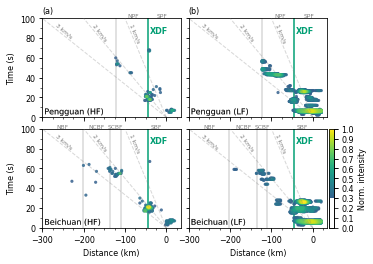

In [15]:
def TimeEvo(file, locx, locy, figtitle, wh, rotation, segflag):
    cm = plt.cm.get_cmap('viridis')
    ax = fig.add_axes([locx, locy, 0.35, 0.25*wh])
    minorLocator = MultipleLocator(25)
    ax.xaxis.set_minor_locator(minorLocator)
    majorLocator = MultipleLocator(100)
    ax.xaxis.set_major_locator(majorLocator)
    minorLocator = MultipleLocator(10)
    ax.yaxis.set_minor_locator(minorLocator)
    majorLocator = MultipleLocator(20)
    ax.yaxis.set_major_locator(majorLocator)

    #awk '$3 >= 0.3 {print $0}' < hbp_proj_BF.txt | sort -k 3 -n  > hbp_proj_BF_0.3.txt 
    data=np.loadtxt(file); x, y, z = (data[:,0], data[:,1], data[:,2])
    ax.scatter(x, y, c = z, s = 10, cmap = cm, edgecolor = 'none', vmin=0, vmax=1, zorder = 10, alpha=0.85)

    ax.plot([0, -100], [0, 100], c = 'C7', alpha = 0.3, zorder = 10, linestyle='--', lw=1)
    ax.plot([0, -200], [0, 100], c = 'C7', alpha = 0.3, zorder = 10, linestyle='--', lw=1)
    ax.plot([0, -300], [0, 100], c = 'C7', alpha = 0.3, zorder = 10, linestyle='--', lw=1)
    x, y, text = ([-92, -180, -270], [92, 92, 92], ['1 km/s', '2 km/s', '3 km/s'])
    for x, y, text, rotation in zip(x, y, text, rotation):
        ax.text(x, y, text, color = 'C7', size = 6, \
                rotation = rotation, bbox={'pad':0.1, 'facecolor':'w', 'edgecolor':'none', 'alpha':0.5})
    ax.plot([-45, -45],[-20, 120], color=green, zorder = 0)
    ax.text(-40, 85, 'XDF', color = green, fontweight = 'bold')                
    text=ax.text(-295, 1, figtitle, ha='left', va='bottom')
    text.set_path_effects([path_effects.Stroke(linewidth=0.5, foreground='w'), path_effects.Normal()])
    if segflag==0:
        ax.plot([-110, -110],[-20, 120], color='C7', zorder = 0, alpha = 0.3)
        ax.plot([-136, -136],[-20, 120], color='C7', zorder = 0, alpha = 0.3)
        ax.plot([-202, -202],[-20, 120], color='C7', zorder = 0, alpha = 0.3)
        ax.text(-25, 100, 'SBF', ha='center', va='bottom', color='C7', size=6)
        ax.text(-123, 100, 'SCBF', ha='center', va='bottom', color='C7', size=6)
        ax.text(-168, 100, 'NCBF', ha='center', va='bottom', color='C7', size=6)
        ax.text(-250, 100, 'NBF', ha='center', va='bottom', color='C7', size=6)
    elif segflag==1:
        ax.plot([-122, -122],[-20, 120], color='C7', zorder = 0, alpha = 0.3)
        ax.text(-10, 100, 'SPF', ha='center', va='bottom', color='C7', size=6)
        ax.text(-80, 100, 'NPF', ha='center', va='bottom', color='C7', size=6)
    ax.set_xlim(-300, 35); ax.set_ylim([0, 100])
    return ax

w = 5.5; h = 4.0; wh=w/h
fig=plt.figure(figsize=(w, h))
rotation = [-68, -53, -41]
ax1=TimeEvo('data/results_HF_0-180/hbp_proj_PF_0.3.txt', 0.12, 0.55, 'Pengguan (HF)', wh, rotation, 1)
axp1=ax1.get_position()
ax1.set_xticklabels([])
ax1.set_ylabel('Time (s)')

ax2=TimeEvo('data/results_HF_0-180/hbp_proj_BF_0.3.txt', axp1.x0, axp1.y0-0.25*wh-0.04, 'Beichuan (HF)', wh, rotation, 0)
axp2=ax2.get_position()
ax2.set_xlabel('Distance (km)')
ax2.set_ylabel('Time (s)')


ax3=TimeEvo('data/results_LF_0-180/hbp_proj_PF_0.3.txt', axp1.x1+0.02, axp1.y0, 'Pengguan (LF)', wh, rotation, 1)
axp3=ax3.get_position()
ax3.set_xticklabels([])
ax3.set_yticklabels([])

ax4=TimeEvo('data/results_LF_0-180/hbp_proj_BF_0.3.txt', axp3.x0, axp3.y0-0.25*wh-0.04, 'Beichuan (LF)', wh, rotation, 0)
axp4=ax4.get_position()
ax4.set_xlabel('Distance (km)')
ax4.set_yticklabels([])

cax=fig.add_axes([axp4.x1+0.005, axp4.y0, 0.012, axp4.y1-axp4.y0])
cax.set_yticks(np.arange(0, 1.1, 0.1))
cax.yaxis.set_ticks_position('right')
cax.yaxis.set_label_position('right')
cax.set_xticks([])
cax.set_ylabel('Norm. intensity')

cax=fig.add_axes([axp4.x1+0.005, axp4.y0+((axp4.y1-axp4.y0)*0.3), 0.012, (axp4.y1-axp4.y0)*0.7])
norm=mpl.colors.Normalize(vmin=0, vmax=1)
cbar=mpl.colorbar.ColorbarBase(cax,cmap='viridis',norm=norm, ticks=np.arange(0, 1.1, 0.1), alpha=0.85)
cbar.ax.set_yticklabels([])
cbar.ax.set_ylim([0.3, 1])

fig.text(axp1.x0, axp1.y1+0.01, '(a)', va='bottom', ha='left')
fig.text(axp3.x0, axp1.y1+0.01, '(b)', va='bottom', ha='left')

plt.savefig('doc/timeevo_0-180R1.pdf', bbox_inches="tight", pad_inches=0.1)
plt.show()

# Figure 4

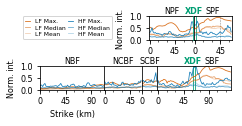

In [16]:
def StrDepthViewRepr(datapath, segname, deplen, axheight, canvasaspect, xloc, yloc, dl, dk):
    majorLocator = MultipleLocator(45)
    minorLocator = MultipleLocator(15)
    linewidth = 0.8
    
    data = np.loadtxt('data/results_HF_0-180/hbp_ave_'+segname+'.txt')
    x = data[:, 0]; ymaximumhf = data[:, 3]; ymeanhf = data[:,1]; ymedianhf = data[:,2]

    data = np.loadtxt('data/results_LF_0-180/hbp_ave_'+segname+'.txt')
    x = data[:, 0]; ymaximumlf = data[:, 3]; ymeanlf = data[:,1]; ymedianlf = data[:,2]

    dataaspect = ((x.max() + 1) - (x.min() - 1)) / deplen
    axwidth = axheight / canvasaspect * dataaspect
    ax = fig.add_axes([xloc, yloc, axwidth, axheight])

    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_minor_locator(minorLocator)

    if segname == 'SBF':
        ax.set_title(segname, x = 0.74, y=0.85)
    else: 
        ax.set_title(segname, y=0.85)
    ax.set_xlim([x.min() - 1, x.max() + 1])
    ax.set_ylim([0, 1])
    #ax.set_yticks([0, 0.5, 1])

    ax.plot(x, ymaximumlf, color = orange, alpha = 0.9, label = 'LF Max.', linewidth = linewidth)
    ax.plot(x, ymedianlf, color = orange, alpha = 0.6, label = 'LF Median', linewidth = linewidth)
    ax.plot(x, ymeanlf, color = orange, alpha = 0.3, label = 'LF Mean', linewidth = linewidth)

    ax.plot(x, ymaximumhf, color = blue, alpha = 0.9, label = 'HF Max.', linewidth = linewidth)
    ax.plot(x, ymedianhf, color = blue, alpha = 0.6, label = 'HF Median', linewidth = linewidth)
    ax.plot(x, ymeanhf, color = blue, alpha = 0.3, label = 'HF Mean', linewidth = linewidth)

    return ax
def StaticResultRepr(datapath, deplen, axheight, canvasaspect, xloc, yloc, dl, dk):
    overlapalpha = 0.2
    ax = StrDepthViewRepr(datapath, 'NBF', deplen, axheight, canvasaspect, xloc, yloc, dl, dk)
    ax.set_xlabel('Strike (km)'); ax.set_ylabel('Norm. int.')
    ax.set_yticks([0, 0.5, 1])
    
    axp = ax.get_position(); xloc = axp.x1
    ax = StrDepthViewRepr(datapath, 'NCBF', deplen, axheight, canvasaspect, xloc, yloc, dl, dk)
    ax.set_yticks([])
    
    axp = ax.get_position(); xloc = axp.x1
    ax = StrDepthViewRepr(datapath, 'SCBF', deplen, axheight, canvasaspect, xloc, yloc, dl, dk)
    ax.set_yticks([])
    
    axp = ax.get_position(); xloc = axp.x1
    ax = StrDepthViewRepr(datapath, 'SBF', deplen, axheight, canvasaspect, xloc, yloc, dl, dk)
    rect = plt.Rectangle([62,0], 4, 1, facecolor = 'none', edgecolor = green, \
                         linewidth = 1, alpha = 0.8, clip_on=False)
    ax.add_patch(rect)
    ax.text(62,1.1,'XDF',ha='center', color = green, weight = 'bold')
    ax.set_yticks([])
    
    xloc = 0.61; yloc = yloc+0.21*canvasaspect
    ax = StrDepthViewRepr(datapath, 'NPF', deplen, axheight, canvasaspect, xloc, yloc, dl, dk)
    ax.text(79,1.1,'XDF',ha='center',color = green, weight = 'bold')
    ax.set_yticks([0, 0.5, 1])
    ax.set_ylabel('Norm. int.')
    
    axp = ax.get_position(); xloc = axp.x1
    ax = StrDepthViewRepr(datapath, 'SPF', deplen, axheight, canvasaspect, xloc, yloc, dl, dk)
    rect = plt.Rectangle([-3,0], 4, 1, facecolor = 'none', edgecolor = green, \
                         linewidth = 1, alpha = 0.8, clip_on=False)
    ax.add_patch(rect)
    ax.plot([44,44], [0,1], color='C7', linewidth=0.5, zorder = 0, linestyle='--')
    ax.set_yticks([])
        
    plt.legend(bbox_to_anchor=(-2.2, 1), loc=1, ncol=2, borderaxespad=0, \
               fontsize=6, handlelength=0.8, labelspacing=0.2, columnspacing=0.5)
w = 3.3; h = 2; #canvas size in inches
fig = plt.figure(figsize = (w, h))
canvasaspect = w/h; dl = 2.0; dk = 2.0; deplen = 42.0; axheight = 0.1*canvasaspect
xloc = 0.15; yloc = 0.15*canvasaspect
StaticResultRepr('data/results_HF_0-180/', deplen, axheight, canvasaspect, xloc, yloc, dl, dk)
plt.savefig('doc/StaticRepresentative_0-180R1.pdf', bbox_inches="tight", pad_inches=0.1)
plt.show()

# Figure S1

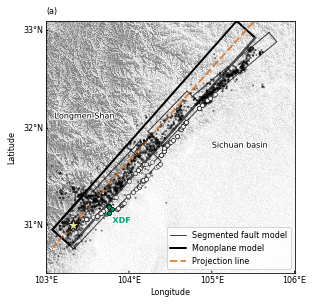

In [35]:
w=6.9; h=6.9; wh=w/h
fig=plt.figure(figsize=(w, h))
#############################################################
lonmin=103; lonmax=106; latmin=30.5; latmax=33.1
m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
            rsphere=(6378137.00,6356752.3142),resolution='c',projection='merc')
x, y=m([lonmin, lonmax], [latmin, latmax])
aspect=max(x)/max(y)
ax1=fig.add_axes([0.1, 0.1, 0.5, 0.5/aspect])
axp1=ax1.get_position()
ax1.set_xlabel('Longitude', labelpad=15)
ax1.set_ylabel('Latitude', labelpad=30)
m.drawparallels(np.arange(-80.,81.,1.),labels=[1,0,0,0], fontsize=initfontsize, dashes=(2,10000), color='k')
m.drawmeridians(np.arange(-180.,181.,1.),labels=[0,0,0,1], fontsize=initfontsize, dashes=(2,10000), color='k')
DrawTopography(m)
segname=['SBF', 'SCBF', 'NCBF', 'NBF', 'SPF', 'NPF']
for segname in zip(segname):
    data=np.loadtxt('data/rim_'+str(segname[0])+'.txt'); x, y = m(data[:,0], data[:,1])
    m.plot(x,y,color='k',lw=1, zorder=2, solid_capstyle='round', alpha=0.75)

m.plot([],[],color='k',lw=1, zorder=2, solid_capstyle='round', alpha=0.75, label='Segmented fault model')
data=np.loadtxt('data/knot_plane/rim_Plane.txt')
x,y=m(data[:,0], data[:,1])
m.plot(x,y,color='k',lw=2, label='Monoplane model', zorder = 2, solid_capstyle='round')
data = np.loadtxt('data/RuptVelProjLineA221.txt')
x, y = m(data[:,0], data[:,1])
m.plot(x,y,color=orange,lw=2,label='Projection line', zorder = 5, alpha=0.7, linestyle='--')
DrawSurfaceRuptures(m)
x, y = m([105.525, 103.296],[32.926, 30.782])
m.plot(x,y,color=gray,lw=2,zorder=3, solid_capstyle='round')

x,y=m(103.322, 31.002)
ax1.scatter(x, y, s=160, marker='*', facecolor=yellow, alpha=0.85, lw=1, zorder=10, edgecolor='k')
data=np.loadtxt('data/2010_Yu_Relocated.txt', usecols=(6,7))
x, y=m(data[:,1], data[:,0])
ax1.scatter(x, y, s=4, color='k', edgecolor='none', linewidth=0.1, alpha=0.5, zorder=9)
x, y=m(103.1, 32.1)
ax1.text(x, y, 'Longmen Shan', \
         path_effects=[PathEffects.withStroke(linewidth=2,foreground='w')])
x, y=m(105, 31.8)
ax1.text(x, y, 'Sichuan basin',  \
         path_effects=[PathEffects.withStroke(linewidth=2,foreground='w')])

plt.legend(loc='lower right')
#####################################################
fig.text(axp1.x0, axp1.y1+0.01, '(a)', va='bottom', ha='left')
plt.savefig('doc/figMonoPlaneProjectionLine.pdf', bbox_inches="tight", pad_inches=0.1)
plt.show()

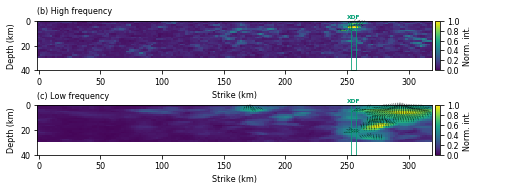

In [26]:
w=6.9; h=6.9; wh=w/h
fig=plt.figure(figsize=(w, h))
cmap=plt.get_cmap('viridis')

def signalrake(data, xloc, yloc, flag):
    data=np.loadtxt(data)
    x, y, z=(data[:,7], data[:,2], data[:,4])
    dip=data[0:1, 3]
    width=max(x)-min(x)
    height=40
    aspect=width/height
    ax=fig.add_axes([xloc, yloc, 0.1*aspect, 0.1])
    normal=mpl.colors.Normalize(vmin=0, vmax=1)
    colors=plt.cm.viridis(normal(z))
    dy = 2.0 * np.sin(np.radians(dip))
    for strike, depth, signal in zip(x, y, colors):
        rect=plt.Rectangle((strike-1, depth-(dy/2.0)), 2.0, dy, facecolor=signal, edgecolor=signal, linewidth=0.001)
        ax.add_patch(rect)
    if flag == 0:
        rake = -180.0 + (data[:, 6] +36 - 1) * 5.0
    elif flag == 90:
        rake = 90
    elif flag == 180:
        rake = 180
    zscale = np.zeros(len(z)); xarrow = np.zeros(len(z)); yarrow = np.zeros(len(z))
    arrowlimit=0.5
    for i in np.arange(0,len(z),1):
        if z[i] > arrowlimit:
            zscale[i] = z[i]; xarrow[i] = x[i]; yarrow[i] = y[i]
        else:
            zscale[i] = 0; xarrow[i] = 0; yarrow[i] = 0        
    ax.quiver(xarrow, yarrow, np.cos(rake * np.pi / 180.0) * zscale * 20, \
              np.sin(rake * np.pi / 180.0) * zscale * 20, \
              units = 'x', width = 0.3, scale = 1 / 0.3, clip_on = False, alpha = 0.6, color = 'k', zorder = 5, \
              minlength=0) 
    ax.scatter(298, 15.0, marker='*', s=100, facecolor='none', edgecolor='w', linewidth=0.5, zorder = 20)
    ax.set_xlim([min(x)-1, max(x)+1])
    ax.set_ylim([0, 40])
    plt.gca().invert_yaxis()
    return ax

def drawpanels(datapath, initxloc, inityloc, panelnum, flag):
    ax1=signalrake(datapath+'hbp_static.txt', initxloc, inityloc, 0)
    axp=ax1.get_position()
    axp1=axp
    rect = plt.Rectangle([253,0], 4, 40, facecolor = 'none', edgecolor = green, \
                         linewidth = 1, alpha = 0.8, clip_on=False)
    ax1.add_patch(rect)
    ax1.text(255,-2,'XDF',ha='center', color = green, weight = 'bold', size=6)
    ax1.set_xlabel('Strike (km)')
    ax1.set_ylabel('Depth (km)')
    cax=fig.add_axes([axp.x1+0.005, axp.y0, 0.01, axp.y1-axp.y0])
    norm=mpl.colors.Normalize(vmin=0, vmax=1)
    cb=mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm).set_label('Norm. int.')
    fig.text(axp1.x0, axp1.y1+0.01, panelnum, va='bottom', ha='left')
drawpanels('data/results_HF_mono_0-180/', 0.07, 0.27, '(b) High frequency', 1)
drawpanels('data/results_LF_mono_0-180/', 0.07, 0.1, '(c) Low frequency', 0)
plt.savefig('doc/figStaticMono.pdf', bbox_inches="tight", pad_inches=0.1)
plt.show()

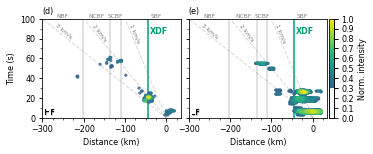

In [37]:
def TimeEvo(file, locx, locy, figtitle, wh, rotation, segflag):
    cm = plt.cm.get_cmap('viridis')
    ax = fig.add_axes([locx, locy, 0.35, 0.25*wh])
    minorLocator = MultipleLocator(25)
    ax.xaxis.set_minor_locator(minorLocator)
    majorLocator = MultipleLocator(100)
    ax.xaxis.set_major_locator(majorLocator)
    minorLocator = MultipleLocator(10)
    ax.yaxis.set_minor_locator(minorLocator)
    majorLocator = MultipleLocator(20)
    ax.yaxis.set_major_locator(majorLocator)

    #awk '$3 >= 0.3 {print $0}' < hbp_proj_BF.txt | sort -k 3 -n  > hbp_proj_BF_0.3.txt 
    data=np.loadtxt(file); x, y, z = (data[:,0], data[:,1], data[:,2])
    ax.scatter(x, y, c = z, s = 10, cmap = cm, edgecolor = 'none', vmin=0, vmax=1, zorder = 10, alpha=0.85)

    ax.plot([0, -100], [0, 100], c = 'C7', alpha = 0.3, zorder = 10, linestyle='--', lw=1)
    ax.plot([0, -200], [0, 100], c = 'C7', alpha = 0.3, zorder = 10, linestyle='--', lw=1)
    ax.plot([0, -300], [0, 100], c = 'C7', alpha = 0.3, zorder = 10, linestyle='--', lw=1)
    x, y, text = ([-92, -180, -270], [92, 92, 92], ['1 km/s', '2 km/s', '3 km/s'])
    for x, y, text, rotation in zip(x, y, text, rotation):
        ax.text(x, y, text, color = 'C7', size = 6, \
                rotation = rotation, bbox={'pad':0.1, 'facecolor':'w', 'edgecolor':'none', 'alpha':0.5})
    ax.plot([-45, -45],[-20, 120], color=green, zorder = 0)
    ax.text(-40, 85, 'XDF', color = green, fontweight = 'bold')                
    text=ax.text(-295, 1, figtitle, ha='left', va='bottom')
    text.set_path_effects([path_effects.Stroke(linewidth=0.5, foreground='w'), path_effects.Normal()])
    if segflag==1:
        ax.plot([-110, -110],[-20, 120], color='C7', zorder = 0, alpha = 0.3)
        ax.plot([-136, -136],[-20, 120], color='C7', zorder = 0, alpha = 0.3)
        ax.plot([-202, -202],[-20, 120], color='C7', zorder = 0, alpha = 0.3)
        ax.text(-25, 100, 'SBF', ha='center', va='bottom', color='C7', size=6)
        ax.text(-123, 100, 'SCBF', ha='center', va='bottom', color='C7', size=6)
        ax.text(-168, 100, 'NCBF', ha='center', va='bottom', color='C7', size=6)
        ax.text(-250, 100, 'NBF', ha='center', va='bottom', color='C7', size=6)
    elif segflag==0:
        ax.plot([-122, -122],[-20, 120], color='C7', zorder = 0, alpha = 0.3)
        ax.text(-10, 100, 'SPF', ha='center', va='bottom', color='C7', size=6)
        ax.text(-80, 100, 'NPF', ha='center', va='bottom', color='C7', size=6)
    ax.set_xlim(-300, 35); ax.set_ylim([0, 100])
    return ax

w = 5.5; h = 4.0; wh=w/h
fig=plt.figure(figsize=(w, h))
rotation = [-68, -53, -41]
ax1=TimeEvo('data/results_HF_mono_0-180/hbp_proj_0.3.txt', 0.12, 0.55, 'HF', wh, rotation, 1)
axp1=ax1.get_position()
ax1.set_xlabel('Distance (km)')
ax1.set_ylabel('Time (s)')

ax2=TimeEvo('data/results_LF_mono_0-180/hbp_proj_0.3.txt', axp1.x1+0.02, axp1.y0, 'LF', wh, rotation, 1)
axp2=ax2.get_position()
ax2.set_yticklabels([])
ax2.set_xlabel('Distance (km)')

cax=fig.add_axes([axp2.x1+0.005, axp2.y0, 0.012, axp2.y1-axp2.y0])
cax.set_yticks(np.arange(0, 1.1, 0.1))
cax.yaxis.set_ticks_position('right')
cax.yaxis.set_label_position('right')
cax.set_xticks([])
cax.set_ylabel('Norm. intensity')

cax=fig.add_axes([axp2.x1+0.005, axp2.y0+((axp2.y1-axp2.y0)*0.3), 0.012, (axp2.y1-axp2.y0)*0.7])
norm=mpl.colors.Normalize(vmin=0, vmax=1)
cbar=mpl.colorbar.ColorbarBase(cax,cmap='viridis',norm=norm, ticks=np.arange(0, 1.1, 0.1), alpha=0.85)
cbar.ax.set_yticklabels([])
cbar.ax.set_ylim([0.3, 1])

fig.text(axp1.x0, axp1.y1+0.01, '(d)', va='bottom', ha='left')
fig.text(axp2.x0, axp1.y1+0.01, '(e)', va='bottom', ha='left')

plt.savefig('doc/figTimeEvoMono_0-180.pdf', bbox_inches="tight", pad_inches=0.1)
plt.show()

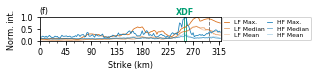

In [45]:
def StrDepthViewRepr(datapath, deplen, axheight, canvasaspect, xloc, yloc, dl, dk):
    majorLocator = MultipleLocator(45)
    minorLocator = MultipleLocator(15)
    linewidth = 0.8
    
    data = np.loadtxt('data/results_HF_mono_0-180/hbp_ave.txt')
    x = data[:, 0]; ymaximumhf = data[:, 3]; ymeanhf = data[:,1]; ymedianhf = data[:,2]

    data = np.loadtxt('data/results_LF_mono_0-180/hbp_ave.txt')
    x = data[:, 0]; ymaximumlf = data[:, 3]; ymeanlf = data[:,1]; ymedianlf = data[:,2]

    dataaspect = ((x.max() + 1) - (x.min() - 1)) / deplen
    axwidth = axheight / canvasaspect * dataaspect
    ax = fig.add_axes([xloc, yloc, axwidth, axheight])

    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_minor_locator(minorLocator)

    ax.set_xlim([x.min() - 1, x.max() + 1])
    ax.set_ylim([0, 1])
    #ax.set_yticks([0, 0.5, 1])

    ax.plot(x, ymaximumlf, color = orange, alpha = 0.9, label = 'LF Max.', linewidth = linewidth)
    ax.plot(x, ymedianlf, color = orange, alpha = 0.6, label = 'LF Median', linewidth = linewidth)
    ax.plot(x, ymeanlf, color = orange, alpha = 0.3, label = 'LF Mean', linewidth = linewidth)

    ax.plot(x, ymaximumhf, color = blue, alpha = 0.9, label = 'HF Max.', linewidth = linewidth)
    ax.plot(x, ymedianhf, color = blue, alpha = 0.6, label = 'HF Median', linewidth = linewidth)
    ax.plot(x, ymeanhf, color = blue, alpha = 0.3, label = 'HF Mean', linewidth = linewidth)

    return ax
def StaticResultRepr(datapath, deplen, axheight, canvasaspect, xloc, yloc, dl, dk):
    overlapalpha = 0.2
    ax = StrDepthViewRepr(datapath, deplen, axheight, canvasaspect, xloc, yloc, dl, dk)
    ax.set_xlabel('Strike (km)'); ax.set_ylabel('Norm. int.')
    ax.set_yticks([0, 0.5, 1])
    rect = plt.Rectangle([253,0], 4, 1, facecolor = 'none', edgecolor = green, \
                         linewidth = 1, alpha = 0.8, clip_on=False)
    ax.add_patch(rect)
    ax.text(255,1.1,'XDF',ha='center', color = green, weight = 'bold')
    ax.plot([298,298], [0,1], color='gray', linewidth=1, zorder = 0, linestyle='--')
    plt.legend(bbox_to_anchor=(1.5, 1), loc=1, ncol=2, borderaxespad=0, \
               fontsize=6, handlelength=0.8, labelspacing=0.2, columnspacing=0.5)
    axp=ax.get_position()
    fig.text(axp.x0, axp.y1+0.01, '(f)', va='bottom', ha='left')
w = 3.3; h = 2; #canvas size in inches
fig = plt.figure(figsize = (w, h))
canvasaspect = w/h; dl = 2.0; dk = 2.0; deplen = 42.0; axheight = 0.1*canvasaspect
xloc = 0.15; yloc = 0.15*canvasaspect
StaticResultRepr('data/results_HF_mono_0-180/', deplen, axheight, canvasaspect, xloc, yloc, dl, dk)
plt.savefig('doc/figStaticRepresentativeMono_0-180.pdf', bbox_inches="tight", pad_inches=0.1)
plt.show()

# Figure S2

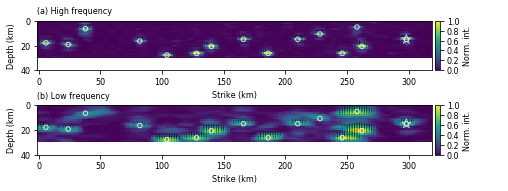

In [13]:
w=6.9; h=6.9; wh=w/h
fig=plt.figure(figsize=(w, h))
cmap=plt.get_cmap('viridis')

def signalrake(data, xloc, yloc, flag):
    data=np.loadtxt(data)
    x, y, z=(data[:,7], data[:,2], data[:,4])
    dip=data[0:1, 3]
    width=max(x)-min(x)
    height=40
    aspect=width/height
    ax=fig.add_axes([xloc, yloc, 0.1*aspect, 0.1])
    normal=mpl.colors.Normalize(vmin=0, vmax=1)
    colors=plt.cm.viridis(normal(z))
    dy = 2.0 * np.sin(np.radians(dip))
    for strike, depth, signal in zip(x, y, colors):
        rect=plt.Rectangle((strike-1, depth-(dy/2.0)), 2.0, dy, facecolor=signal, edgecolor=signal, linewidth=0.001)
        ax.add_patch(rect)
    if flag == 0:
        rake = -180.0 + (data[:, 6] +36 - 1) * 5.0
    elif flag == 90:
        rake = 90
    elif flag == 180:
        rake = 180
    zscale = np.zeros(len(z)); xarrow = np.zeros(len(z)); yarrow = np.zeros(len(z))
    arrowlimit=0.5
    for i in np.arange(0,len(z),1):
        if z[i] > arrowlimit:
            zscale[i] = z[i]; xarrow[i] = x[i]; yarrow[i] = y[i]
        else:
            zscale[i] = 0; xarrow[i] = 0; yarrow[i] = 0        
    ax.quiver(xarrow, yarrow, np.cos(rake * np.pi / 180.0) * zscale * 20, \
              np.sin(rake * np.pi / 180.0) * zscale * 20, \
              units = 'x', width = 0.3, scale = 1 / 0.3, clip_on = False, alpha = 0.6, color = 'k', zorder = 5, \
              minlength=0)
    ax.scatter(298, 15.0, marker='*', s=100, facecolor='none', edgecolor='w', linewidth=0.5, zorder = 20)
    data = np.loadtxt('data/synpoint.txt')
    xsyn, ysyn = ([(data[:,3]-1)*2.0, data[:,2]])
    ax.scatter(xsyn, ysyn, zorder=10, s=20, facecolor='none', edgecolor='w', alpha=0.8)
    ax.set_xlim([min(x)-1, max(x)+1])
    ax.set_ylim([0, 40])
    plt.gca().invert_yaxis()
    return ax

def drawpanels(datapath, initxloc, inityloc, panelnum, flag):
    ax1=signalrake(datapath+'hbp_static.txt', initxloc, inityloc, 0)
    axp=ax1.get_position()
    axp1=axp
    ax1.set_xlabel('Strike (km)')
    ax1.set_ylabel('Depth (km)')
    cax=fig.add_axes([axp.x1+0.005, axp.y0, 0.01, axp.y1-axp.y0])
    norm=mpl.colors.Normalize(vmin=0, vmax=1)
    cb=mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm).set_label('Norm. int.')
    fig.text(axp1.x0, axp1.y1+0.01, panelnum, va='bottom', ha='left')
drawpanels('data/results_syn_HF_mono/', 0.07, 0.27, '(a) High frequency', 1)
drawpanels('data/results_syn_LF_mono/', 0.07, 0.1, '(b) Low frequency', 0)
plt.savefig('doc/figSynStatic.pdf', bbox_inches="tight", pad_inches=0.1)
plt.show()

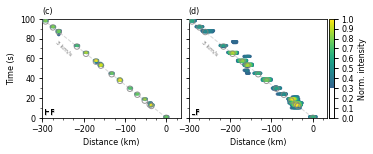

In [6]:
def TimeEvo(file, locx, locy, figtitle, wh):
    cm = plt.cm.get_cmap('viridis')
    ax = fig.add_axes([locx, locy, 0.35, 0.25*wh])
    minorLocator = MultipleLocator(25)
    ax.xaxis.set_minor_locator(minorLocator)
    majorLocator = MultipleLocator(100)
    ax.xaxis.set_major_locator(majorLocator)
    minorLocator = MultipleLocator(10)
    ax.yaxis.set_minor_locator(minorLocator)
    majorLocator = MultipleLocator(20)
    ax.yaxis.set_major_locator(majorLocator)

    #awk '$3 >= 0.3 {print $0}' < hbp_proj_BF.txt | sort -k 3 -n  > hbp_proj_BF_0.3.txt 
    data=np.loadtxt(file); x, y, z = (data[:,0], data[:,1], data[:,2])
    ax.scatter(x, y, c = z, s = 10, cmap = cm, edgecolor = 'none', vmin=0, vmax=1, zorder = 10, alpha=0.85)
    ax.plot([0, -300], [0, 100], c = 'C7', alpha = 0.3, zorder = 10, linestyle='--', lw=1)
    ax.text(-270, 75, '3 km/s', color = 'C7', size = 6, \
            rotation = -42, bbox={'pad':0.1, 'facecolor':'w', 'edgecolor':'none', 'alpha':0.5})
    text=ax.text(-295, 1, figtitle, ha='left', va='bottom')
    text.set_path_effects([path_effects.Stroke(linewidth=0.5, foreground='w'), path_effects.Normal()])
    data = np.loadtxt('data/synpoint_projected.txt')
    x = data[:]
    for x in zip(x):
        y = np.abs(x)/3.0
        ax.scatter(x, y, zorder=10, s=30, facecolor='none', edgecolor='gray', alpha=0.8)
    ax.set_xlim(-300, 35); ax.set_ylim([0, 100])
    return ax

w = 5.5; h = 4.0; wh=w/h
fig=plt.figure(figsize=(w, h))
ax1=TimeEvo('data/results_syn_HF_mono/hbp_proj_0.3.txt', 0.12, 0.55, 'HF', wh)
axp1=ax1.get_position()
ax1.set_xlabel('Distance (km)')
ax1.set_ylabel('Time (s)')

ax2=TimeEvo('data/results_syn_LF_mono/hbp_proj_0.3.txt', axp1.x1+0.02, axp1.y0, 'LF', wh)
axp2=ax2.get_position()
ax2.set_yticklabels([])
ax2.set_xlabel('Distance (km)')

cax=fig.add_axes([axp2.x1+0.005, axp2.y0, 0.012, axp2.y1-axp2.y0])
cax.set_yticks(np.arange(0, 1.1, 0.1))
cax.yaxis.set_ticks_position('right')
cax.yaxis.set_label_position('right')
cax.set_xticks([])
cax.set_ylabel('Norm. intensity')

cax=fig.add_axes([axp2.x1+0.005, axp2.y0+((axp2.y1-axp2.y0)*0.3), 0.012, (axp2.y1-axp2.y0)*0.7])
norm=mpl.colors.Normalize(vmin=0, vmax=1)
cbar=mpl.colorbar.ColorbarBase(cax,cmap='viridis',norm=norm, ticks=np.arange(0, 1.1, 0.1), alpha=0.85)
cbar.ax.set_yticklabels([])
cbar.ax.set_ylim([0.3, 1])

fig.text(axp1.x0, axp1.y1+0.01, '(c)', va='bottom', ha='left')
fig.text(axp2.x0, axp1.y1+0.01, '(d)', va='bottom', ha='left')

plt.savefig('doc/figTimeEvoMonoSyn.pdf', bbox_inches="tight", pad_inches=0.1)
plt.show()

# Figure S3

1 1
2 2
3 4
4 5
5 11


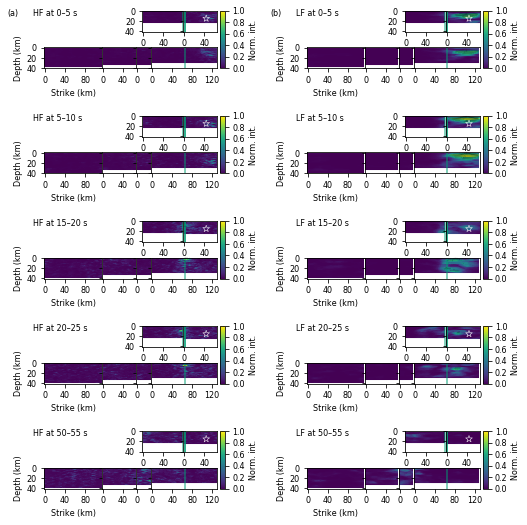

In [10]:
def StrDepthViewPhoto(infile, segname, deplen, axheight, canvasaspect, xloc, yloc, dl, dk, arrowlimit, flag):
    data = np.loadtxt(infile)
    x = data[:, 7]; y = data[:, 2]; z = data[:, 4]; dip = data[0:1, 3]
    if flag == 0:
        rake = -180.0 + (data[:, 6] +36 - 1) * 5.0
    elif flag == 90:
        rake = 90
    elif flag == 180:
        rake = 180
    zscale = np.zeros(len(z)); xarrow = np.zeros(len(z)); yarrow = np.zeros(len(z))
    for i in np.arange(0,len(z),1):
        if z[i] > arrowlimit:
            zscale[i] = z[i]; xarrow[i] = x[i]; yarrow[i] = y[i]
        else:
            zscale[i] = 0; xarrow[i] = 0; yarrow[i] = 0
    dataaspect = ((x.max() + 2) - (x.min() - 2)) / deplen
    axwidth = axheight / canvasaspect * dataaspect
    ax = fig.add_axes([xloc, yloc, axwidth, axheight])
    ax.set_xticks(np.arange(0, x.max(), 40))
    ax.set_yticks(np.arange(0, deplen-1, 20))
    ax.set_xlim([x.min() - 2, x.max() + 2])
    ax.set_ylim([-1, deplen - 1])
    ax.set_ylim(ax.get_ylim()[::-1])
    dy = dk * np.sin(np.radians(dip))
    numy = int(deplen / 2); numx = int(len(x) / numy)
    x1 = np.linspace(x.min(), x.max(), num=numx)
    y1 = np.linspace(y.max(), y.min(), num=numy)
    X, Y = np.meshgrid(x1, y1)
    ax.quiver(xarrow, yarrow, np.cos(rake * np.pi / 180.0) * zscale * 20, np.sin(rake * np.pi / 180.0) * zscale * 20, \
              units = 'x', width = 0.3, scale = 1 / 0.3, clip_on = False, alpha = 0.6, color = 'k', zorder = 5, \
             minlength=0)
    normal = mpl.colors.Normalize(vmin = 0, vmax = 1)
    colors = plt.cm.viridis(normal(z))
    for x, y, z in zip(x, y, colors):
        rect = plt.Rectangle((x - (dl / 2),y - (dy / 2)), dl, dy, facecolor = z, edgecolor = z, linewidth = 0.05)
        ax.add_patch(rect)
    return ax
def SnapResultPhoto(datapath, deplen, axheight, canvasaspect, xloc, yloc, dl, dk, arrowlimit, filenum, flag):
    overlapalpha = 0.2
    xlocinit = xloc
    ax = StrDepthViewPhoto(str(datapath)+'hbp_snap_NBF_'+str(filenum)+'.txt', 'NBF', deplen, axheight, canvasaspect, \
                      xloc, yloc, dl, dk, arrowlimit, flag)
    ax.set_xlabel('Strike (km)'); ax.set_ylabel('Depth (km)')

    axp = ax.get_position(); xloc = axp.x1
    ax = StrDepthViewPhoto(str(datapath)+'hbp_snap_NCBF_'+str(filenum)+'.txt', 'NCBF', deplen, axheight, canvasaspect, \
                      xloc, yloc, dl, dk, arrowlimit, flag)
    ax.tick_params(axis = 'y', which = 'both', labelleft = 'off', labelright = 'off')

    axp = ax.get_position(); xloc = axp.x1
    ax = StrDepthViewPhoto(str(datapath)+'hbp_snap_SCBF_'+str(filenum)+'.txt', 'SCBF', deplen, axheight, canvasaspect, \
                      xloc, yloc, dl, dk, arrowlimit, flag)
    ax.tick_params(axis = 'y', which = 'both', labelleft = 'off', labelright = 'off')
    axp = ax.get_position(); xloc = axp.x1
    ax = StrDepthViewPhoto(str(datapath)+'hbp_snap_SBF_'+str(filenum)+'.txt', 'SBF', deplen, axheight, canvasaspect, \
                      xloc, yloc, dl, dk, arrowlimit, flag)
    ax.tick_params(axis = 'y', which = 'both', labelleft = 'off', labelright = 'off')
    rect = plt.Rectangle([63,-1], 2, 42, facecolor = 'none', edgecolor = green, linewidth = 0.6, alpha = 0.8)
    ax.add_patch(rect)
    axp = ax.get_position(); xloc = axp.x1+0.005
    ax = fig.add_axes([xloc, yloc, 0.01, axheight*2.75])
    norm = mpl.colors.Normalize(vmin=0,vmax=1)
    mpl.colorbar.ColorbarBase(ax, cmap=plt.cm.get_cmap('viridis'), norm=norm, orientation='vertical', \
                              ticks=np.arange(0, 2, 0.2), ticklocation='right').set_label('Norm. int.')
    xloc = xlocinit+0.1867; yloc = yloc+0.07*canvasaspect
    ax = StrDepthViewPhoto(str(datapath)+'hbp_snap_NPF_'+str(filenum)+'.txt', 'NPF', deplen, axheight, canvasaspect, \
                      xloc, yloc, dl, dk, arrowlimit, flag)
    rect = plt.Rectangle([77,-1], 2, 42, facecolor = 'none', edgecolor = green, linewidth = 0.6, alpha = 0.8)
    ax.add_patch(rect)
    axp = ax.get_position(); xloc = axp.x1
    ax = StrDepthViewPhoto(str(datapath)+'hbp_snap_SPF_'+str(filenum)+'.txt', 'SPF', deplen, axheight, canvasaspect, \
                      xloc, yloc, dl, dk, arrowlimit, flag)
    rect = plt.Rectangle([-1,-1], 2, 42, facecolor = 'none', edgecolor = green, linewidth = 1, alpha = 0.8)
    ax.add_patch(rect)
    ax.scatter(44, 15.0, marker='*', s=50, facecolor='none', edgecolor='w', linewidth=0.5, zorder = 20)
    ax.tick_params(axis = 'y', which = 'both', labelleft = 'off', labelright = 'off')
w = 7.3; h = 7.3; #canvas size in inches
canvasaspect = w/h; dl = 2.0; dk = 2.0; deplen = 42.0; axheight = 0.04*canvasaspect
fig = plt.figure(figsize = (w, h))
snapnum=0
snaplist=[1, 2, 4, 5, 11]
for snaplist in zip(snaplist):
    snapnum+=1
    j=snaplist[0]
    i = 200 + j
    shift = 0.77-0.2*(snapnum)
    xloc = 0.07; yloc = 0.3*canvasaspect+shift; arrowlimit = 0.5; datapath = 'data/results_HF_0-180_5s/'
    SnapResultPhoto(datapath, deplen, axheight, canvasaspect, xloc, yloc, dl, dk, arrowlimit, i, 0)
    xloc = 0.57; yloc = 0.3*canvasaspect+shift; arrowlimit = 0.5; datapath = 'data/results_LF_0-180_5s/'
    SnapResultPhoto(datapath, deplen, axheight, canvasaspect, xloc, yloc, dl, dk, arrowlimit, i, 0)

    if snapnum == 1:
        x, y, text = ([0, 0.5],[0.4*canvasaspect+shift, 0.4*canvasaspect+shift],['(a)', '(b)'])
        for x, y, text in zip(x, y, text):
            fig.text(x, y, text, fontsize = initfontsize)
    x, y, text = ([0.05, 0.55],[0.4*canvasaspect+shift, 0.4*canvasaspect+shift],\
                  ['HF at '+str((j-1)*5)+'–'+str(j*5)+' s', 'LF at '+str((j-1)*5)+'–'+str(j*5)+' s'])
    for x, y, text in zip(x, y, text):
        fig.text(x, y, text, fontsize = initfontsize)
    print(snapnum, j)
plt.savefig('doc/figSnap.pdf')
plt.show()

# Figure S4

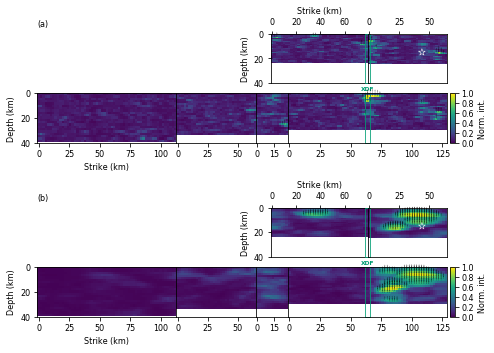

In [12]:
w=6.9; h=6.9; wh=w/h
fig=plt.figure(figsize=(w, h))
cmap=plt.get_cmap('viridis')

def signalrake(data, xloc, yloc, flag):
    data=np.loadtxt(data)
    x, y, z=(data[:,7], data[:,2], data[:,4])
    dip=data[0:1, 3]
    width=max(x)-min(x)
    height=40
    aspect=width/height
    ax=fig.add_axes([xloc, yloc, 0.1*aspect, 0.1])
    normal=mpl.colors.Normalize(vmin=0, vmax=1)
    colors=plt.cm.viridis(normal(z))
    dy = 2.0 * np.sin(np.radians(dip))
    for strike, depth, signal in zip(x, y, colors):
        rect=plt.Rectangle((strike-1, depth-(dy/2.0)), 2.0, dy, facecolor=signal, edgecolor=signal, linewidth=0.001)
        ax.add_patch(rect)
    if flag == 0:
        rake = -180.0 + (data[:, 6] +36 - 1) * 5.0
    elif flag == 90:
        rake = 90
    elif flag == 180:
        rake = 180
    zscale = np.zeros(len(z)); xarrow = np.zeros(len(z)); yarrow = np.zeros(len(z))
    arrowlimit=0.5
    for i in np.arange(0,len(z),1):
        if z[i] > arrowlimit:
            zscale[i] = z[i]; xarrow[i] = x[i]; yarrow[i] = y[i]
        else:
            zscale[i] = 0; xarrow[i] = 0; yarrow[i] = 0        
    ax.quiver(xarrow, yarrow, np.cos(rake * np.pi / 180.0) * zscale * 20, \
              np.sin(rake * np.pi / 180.0) * zscale * 20, \
              units = 'x', width = 0.3, scale = 1 / 0.3, clip_on = False, alpha = 0.6, color = 'k', zorder = 5, \
              minlength=0)    
    ax.set_xlim([min(x)-1, max(x)+1])
    ax.set_ylim([0, 40])
    plt.gca().invert_yaxis()
    return ax

def drawpanels(datapath, initxloc, inityloc, panelnum, flag):
    ax1=signalrake(datapath+'hbp_static_NBF.txt', initxloc, inityloc, 90)
    axp=ax1.get_position()
    axp1=axp

    ax2=signalrake(datapath+'hbp_static_NCBF.txt', axp.x1, axp.y0, 90)
    axp=ax2.get_position()
    axp2=axp

    ax3=signalrake(datapath+'hbp_static_SCBF.txt', axp.x1, axp.y0, 90)
#    if flag==1:
#        rect = plt.Rectangle([18,20], 8, 9, facecolor = 'none', edgecolor = 'w', \
#                             linewidth = 1, alpha = 0.5, clip_on=False)
#        ax3.add_patch(rect)
    ax3.set_xticks([0, 15])
    axp=ax3.get_position()
    axp3=axp

    ax4=signalrake(datapath+'hbp_static_SBF.txt', axp.x1, axp.y0, 90)
    rect = plt.Rectangle([62,0], 4, 40, facecolor = 'none', edgecolor = green, \
                         linewidth = 1, alpha = 0.8, clip_on=False)
    ax4.add_patch(rect)
#    if flag==1:
#        rect = plt.Rectangle([120,12], 8, 8, facecolor = 'none', edgecolor = 'w', \
#                             linewidth = 1, alpha = 0.5, clip_on=False)
#        ax4.add_patch(rect)
    ax4.text(64,-2,'XDF',ha='center', color = green, weight = 'bold', size=6)
    axp=ax4.get_position()
    axp4=axp

    ax5=signalrake(datapath+'hbp_static_NPF.txt', axp4.x0-0.035, axp4.y1+0.02, 90)
#    if flag==1:
#        rect = plt.Rectangle([0,1], 9, 9, facecolor = 'none', edgecolor = 'w', \
#                             linewidth = 1, alpha = 0.5, clip_on=False)
#        ax5.add_patch(rect)
    axp=ax5.get_position()
    axp5=axp

    ax6=signalrake(datapath+'hbp_static_SPF.txt', axp.x1, axp.y0, 90)
    rect = plt.Rectangle([-3,0], 4, 40, facecolor = 'none', edgecolor = green, \
                         linewidth = 1, alpha = 0.8, clip_on=False)
    ax6.add_patch(rect)
#    if flag==1:
#        rect = plt.Rectangle([56,12], 8, 8, facecolor = 'none', edgecolor = 'w', \
#                             linewidth = 1, alpha = 0.5, clip_on=False)
#        ax6.add_patch(rect)
    ax6.scatter(44, 15.0, marker='*', s=50, facecolor='none', edgecolor='w', linewidth=0.5, zorder = 20)
    axp=ax6.get_position()
    axp6=axp

    ax1.set_xlabel('Strike (km)')
    ax1.set_ylabel('Depth (km)')
    ax2.set_yticks([])
    ax3.set_yticks([])
    ax4.set_yticks([])
    ax5.set_xlabel('Strike (km)')
    ax5.set_ylabel('Depth (km)')
    ax5.xaxis.set_ticks_position('top')
    ax5.xaxis.set_label_position('top')
    ax6.xaxis.tick_top()
    ax6.set_yticks([])

    axp=ax4.get_position()
    cax=fig.add_axes([axp.x1+0.005, axp.y0, 0.01, axp.y1-axp.y0])
    norm=mpl.colors.Normalize(vmin=0, vmax=1)
    cb=mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm).set_label('Norm. int.')
    fig.text(axp1.x0, axp5.y1+0.01, panelnum, va='bottom', ha='left')
drawpanels('data/results_HF_90/', 0.07, 0.45, '(a)', 1)
drawpanels('data/results_LF_90/', 0.07, 0.1, '(b)', 0)
plt.savefig('doc/figStatic90.pdf', bbox_inches="tight", pad_inches=0.1)
plt.show()

# Figure S5

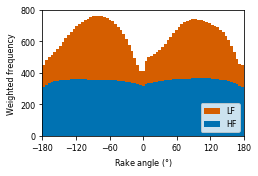

In [8]:
w = 3.5; h = 3.5; wh=w/h
fig=plt.figure(figsize=(w, h))
ax=fig.add_axes([0.16,0.2*wh,0.8,0.5*wh]) 
ax.set_xlim([-180,180]); ax.set_xticks(np.linspace(-180, 180, 7))
ax.set_xlabel("Rake angle ($\degree$)"); ax.set_ylabel('Weighted frequency')

bins = 73
data = np.loadtxt('data/RakeIntensityLF.txt'); x, y = (data[:,0], data[:,1])
ax.hist(x, bins=bins, weights=y, normed=False, zorder = 1, color = orange, label='LF')
data = np.loadtxt('data/RakeIntensityHF.txt'); x, y = (data[:,0], data[:,1])
ax.hist(x, bins=bins, weights=y, normed=False, zorder = 2, color=blue, label='HF')

plt.legend(loc = 'lower right')
plt.savefig('doc/figRakeIntensitySegment.pdf', bbox_inches="tight", pad_inches=0.1)
plt.show()